# Exploring Airline Dataset: Insights and Analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

csv_url = 'https://raw.githubusercontent.com/PunitMann/Airlines-Analysis/main/Airline%20Dataset.csv'
original_csv = pd.read_csv(csv_url)
df = pd.DataFrame(original_csv)

colors = ["red", "blue", "green", "yellow", "pink", "orange", "violet", "brown", "black", "cyan", "gold", "orangered"]

# A Sky Full of Airlines: Visualizing Airline Names

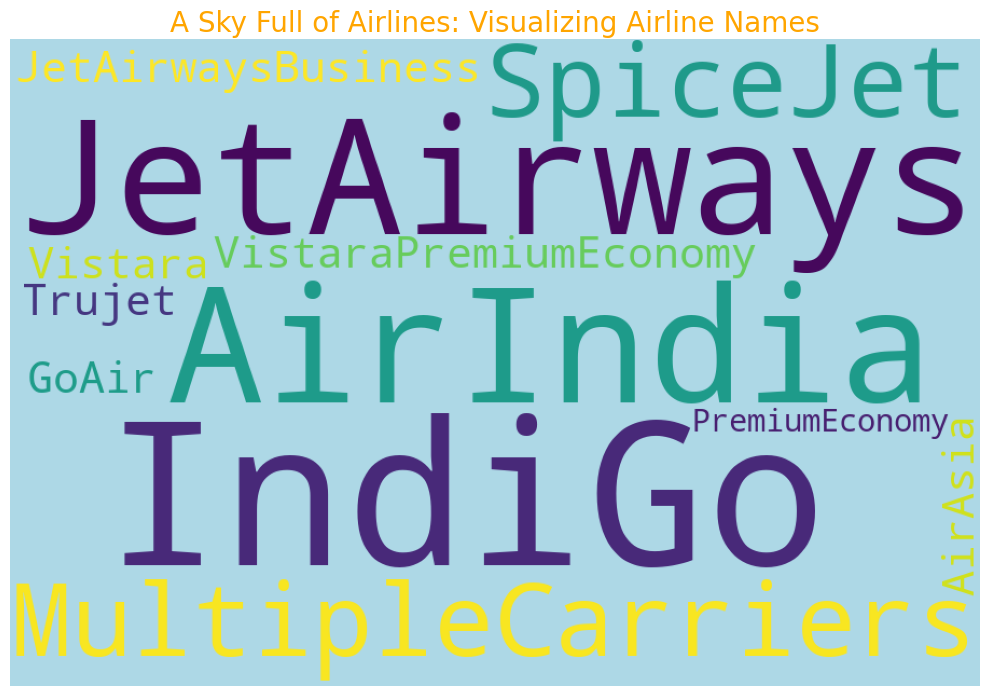

In [2]:
airlines_column = df['Airline']

# Get unique elements from the 'airlines' column
unique_airlines = ', '.join(airlines_column.unique())

# Create a WordCloud object (adjust width and height as needed)
wordcloud = WordCloud(width=900, height=600, background_color='lightblue', stopwords=STOPWORDS, colormap='viridis')

# Generate the word cloud with airline names (adjust colormap)
wordcloud.generate(unique_airlines)

# Create a matplotlib figure
plt.figure(figsize=(10, 9))  # Adjust figure size as desired

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')  # Hide axes

# Display the word cloud board
plt.title('A Sky Full of Airlines: Visualizing Airline Names', fontsize=20, color="orange")  # Add a title
plt.tight_layout()
plt.show()


# Airline Price Peaks: Exploring Maximum Prices Across Airlines

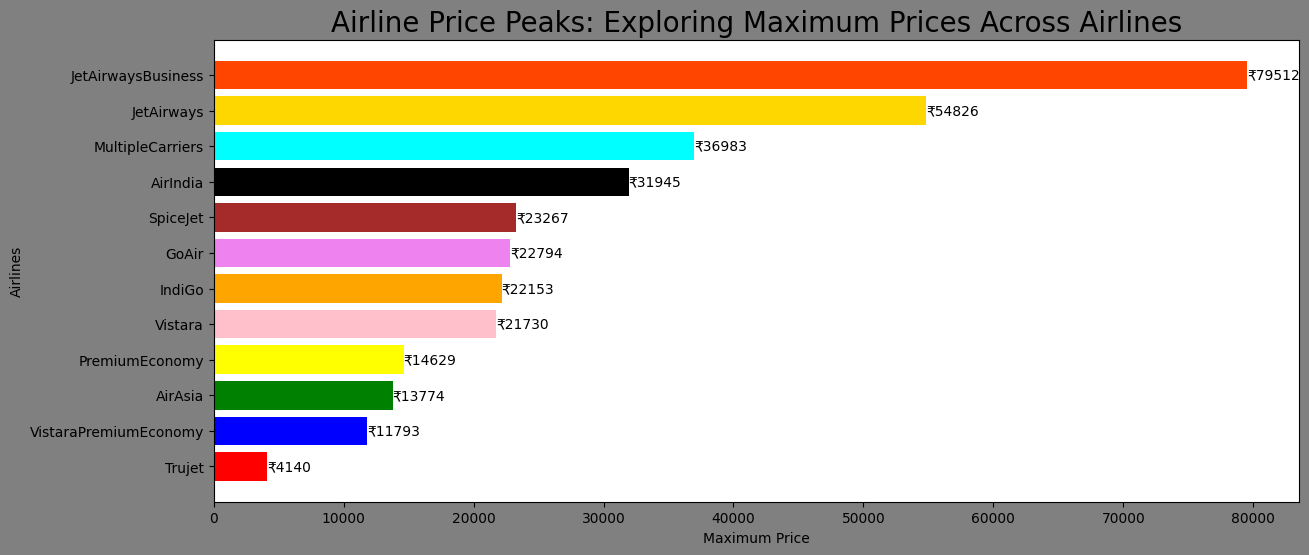

In [3]:
max_price_df = df[df['Flight_Status'] != 'Cancelled']
max_prices = max_price_df.groupby('Airline')['Price'].max().sort_values(ascending=True)

# Convert the result to a DataFrame for easier viewing
result_df = max_prices.reset_index()
result_df.columns = ['Airline', 'Max Price']

fig, ax = plt.subplots(figsize=(14,6))
bars = ax.barh(result_df["Airline"], result_df["Max Price"], color = colors)
ax.set_xlabel("Maximum Price")
ax.set_ylabel("Airlines")

plt.title('Airline Price Peaks: Exploring Maximum Prices Across Airlines', fontsize=20)

# Add annotations to each bar
for bar, label in zip(bars, result_df["Max Price"]):
    width = bar.get_width()
    ax.annotate(f'₹{label:.0f}', xy=(width, bar.get_y() + bar.get_height()/2), va='center', fontsize=10)
fig.set_facecolor('grey')

plt.show()

# Airline Price Peaks: Exploring Minimum Prices Across Airlines

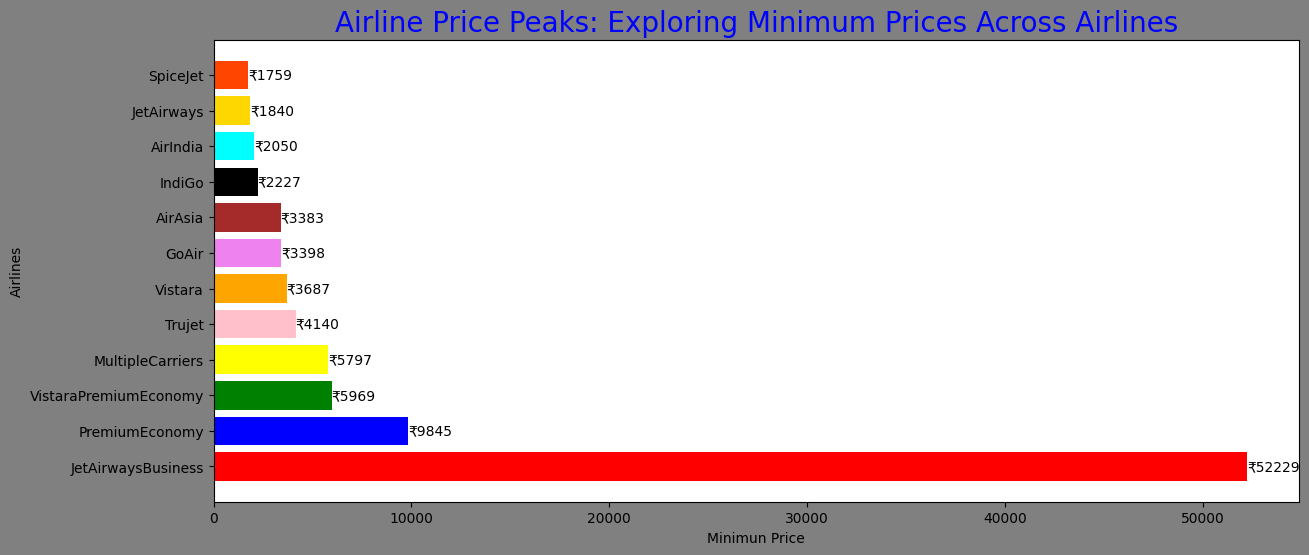

In [4]:
min_price_df = df[df['Flight_Status'] != 'Cancelled']
min_prices = min_price_df.groupby('Airline')['Price'].min().sort_values(ascending=False)

# Convert the result to a DataFrame for easier viewing
result_df = min_prices.reset_index()
result_df.columns = ['Airline', 'Min Price']

fig, ax = plt.subplots(figsize=(14,6))

bars = ax.barh(result_df["Airline"], result_df["Min Price"], color = colors)
ax.set_xlabel("Minimun Price")
ax.set_ylabel("Airlines")

plt.title('Airline Price Peaks: Exploring Minimum Prices Across Airlines', fontsize=20, color="blue")

# Add annotations to each bar
for bar, label in zip(bars, result_df["Min Price"]):
    width = bar.get_width()
    ax.annotate(f'₹{label:.0f}', xy=(width, bar.get_y() + bar.get_height()/2), va='center', fontsize=10)
fig.set_facecolor('grey')

plt.show()

# Exploring Maximum Meal Prices Across Airlines

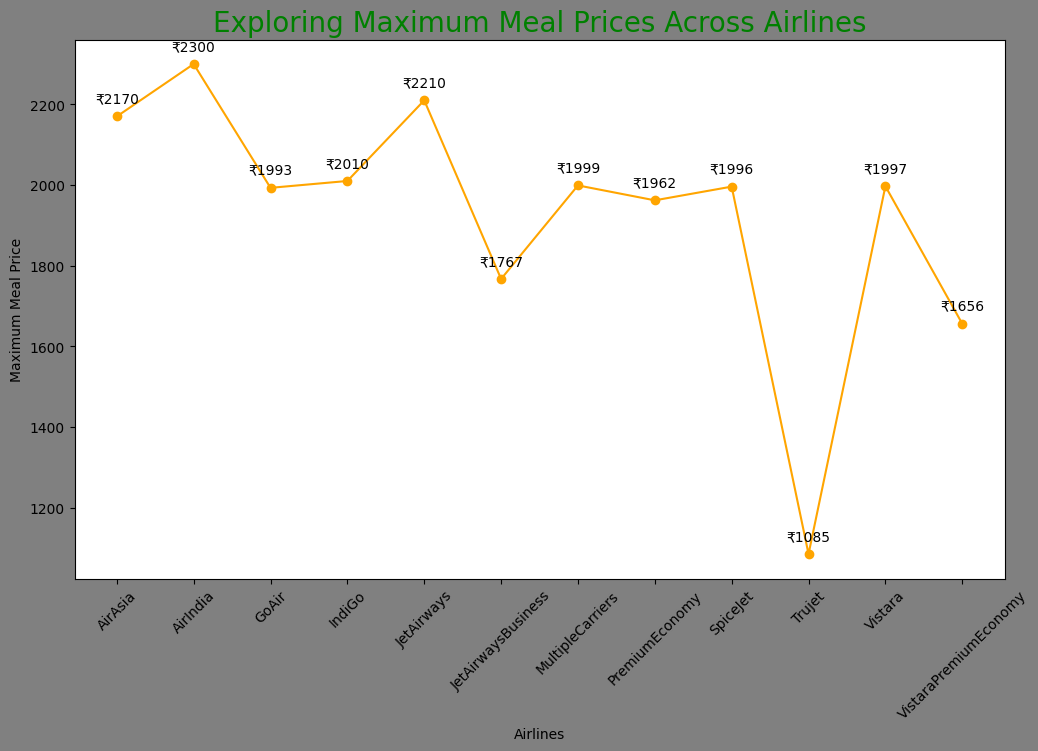

In [5]:
max_meal_df = df[df['Flight_Status'] != 'Cancelled']
meal_max_prices = max_meal_df.groupby('Airline')['Meal Cost'].max()

# Convert the result to a DataFrame for easier viewing
result_df = meal_max_prices.reset_index()
result_df.columns = ['Airline', 'Max Meal Price']

fig, ax = plt.subplots(figsize=(12,7))

plots = ax.plot(result_df["Airline"], result_df["Max Meal Price"], color="orange", marker="o")


ax.set_xlabel("Airlines")
ax.set_ylabel("Maximum Meal Price")

plt.title('Exploring Maximum Meal Prices Across Airlines', fontsize=20, color="green")

for x, y in zip(result_df["Airline"], result_df["Max Meal Price"]):
    ax.annotate(f'₹{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

fig.set_facecolor('grey')
plt.xticks(rotation=45)

plt.show()

# Exploring Minimum Meal Prices Across Airlines

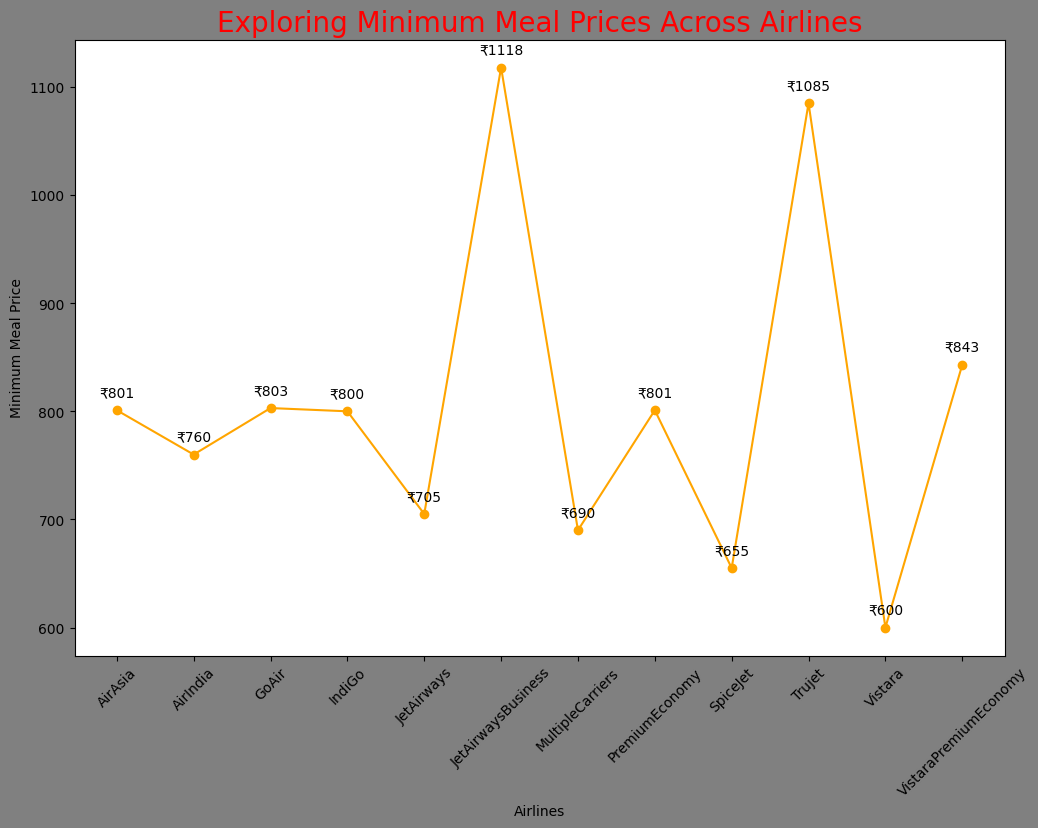

In [6]:
min_meal_df = df[df['Flight_Status'] != 'Cancelled']
meal_min_prices = min_meal_df.groupby('Airline')['Meal Cost'].min()

# Convert the result to a DataFrame for easier viewing
result_df = meal_min_prices.reset_index()
result_df.columns = ['Airline', 'Min Meal Price']

fig, ax = plt.subplots(figsize=(12,8))

plots = ax.plot(result_df["Airline"], result_df["Min Meal Price"], color="orange", marker="o")
ax.set_xlabel("Airlines")
ax.set_ylabel("Minimum Meal Price")

plt.title('Exploring Minimum Meal Prices Across Airlines', fontsize=20, color="red")

for x, y in zip(result_df["Airline"], result_df["Min Meal Price"]):
    ax.annotate(f'₹{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

fig.set_facecolor('grey')
plt.xticks(rotation=45)

plt.show()

# Comparing Completed Flights Across Airlines

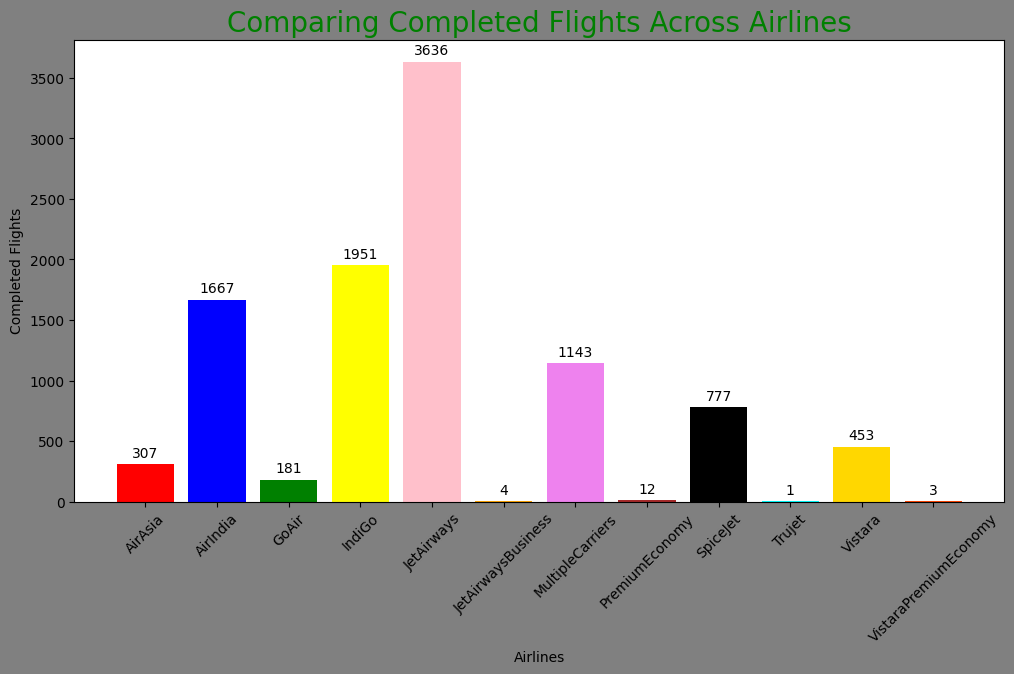

In [7]:
completed_flights = df[df['Flight_Status'] == 'Completed']

# Group by Airline and count the number of cancellations per airline
flight_completed_by_airline = completed_flights.groupby('Airline').size()

# Convert the result to a DataFrame for easier viewing
result_df = flight_completed_by_airline.reset_index()
result_df.columns = ['Airline', 'Flight Status']

fig, ax = plt.subplots(figsize=(12,6))

bars = ax.bar(result_df["Airline"], result_df["Flight Status"], color = colors)
ax.set_xlabel("Airlines")
ax.set_ylabel("Completed Flights")

plt.title('Comparing Completed Flights Across Airlines', fontsize=20, color='green')

# Add annotations to each bar
for bar, label in zip(bars, result_df["Flight Status"]):
    height = bar.get_height()
    ax.annotate(f'{label:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)


fig.set_facecolor('grey')
plt.xticks(rotation=45)

plt.show()

# Assessing Flight Cancellations: Airline Performance Overview

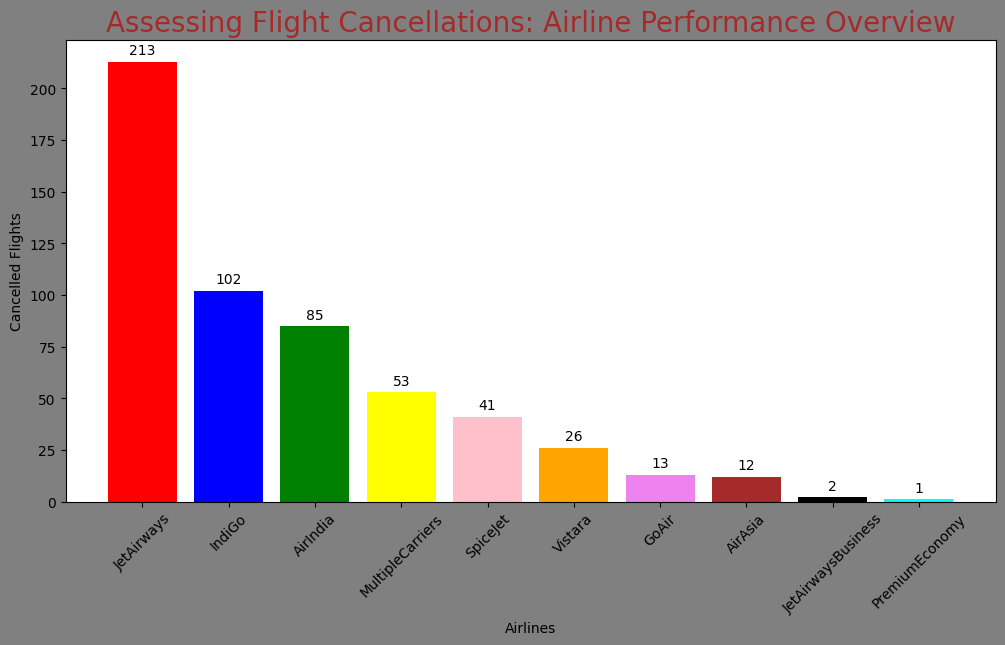

In [8]:
cancelled_flights = df[df['Flight_Status'] == 'Cancelled']

# Group by Airline and count the number of cancellations per airline
flight_cancellations_by_airline = cancelled_flights.groupby('Airline').size().sort_values(ascending=False)

# Convert the result to a DataFrame for easier viewing
result_df = flight_cancellations_by_airline.reset_index()
result_df.columns = ['Airline', 'Flight Status']

fig, ax = plt.subplots(figsize=(12,6))

bars = ax.bar(result_df["Airline"], result_df["Flight Status"], color=colors)
ax.set_xlabel("Airlines")
ax.set_ylabel("Cancelled Flights")

plt.title('Assessing Flight Cancellations: Airline Performance Overview', fontsize=20, color='brown')

# Add annotations to each bar
for bar, label in zip(bars, result_df["Flight Status"]):
    height = bar.get_height()
    ax.annotate(f'{label:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

fig.set_facecolor('grey')
plt.xticks(rotation=45)

plt.show()

# Examining Airline Responses to Varied Cancellation Causes.

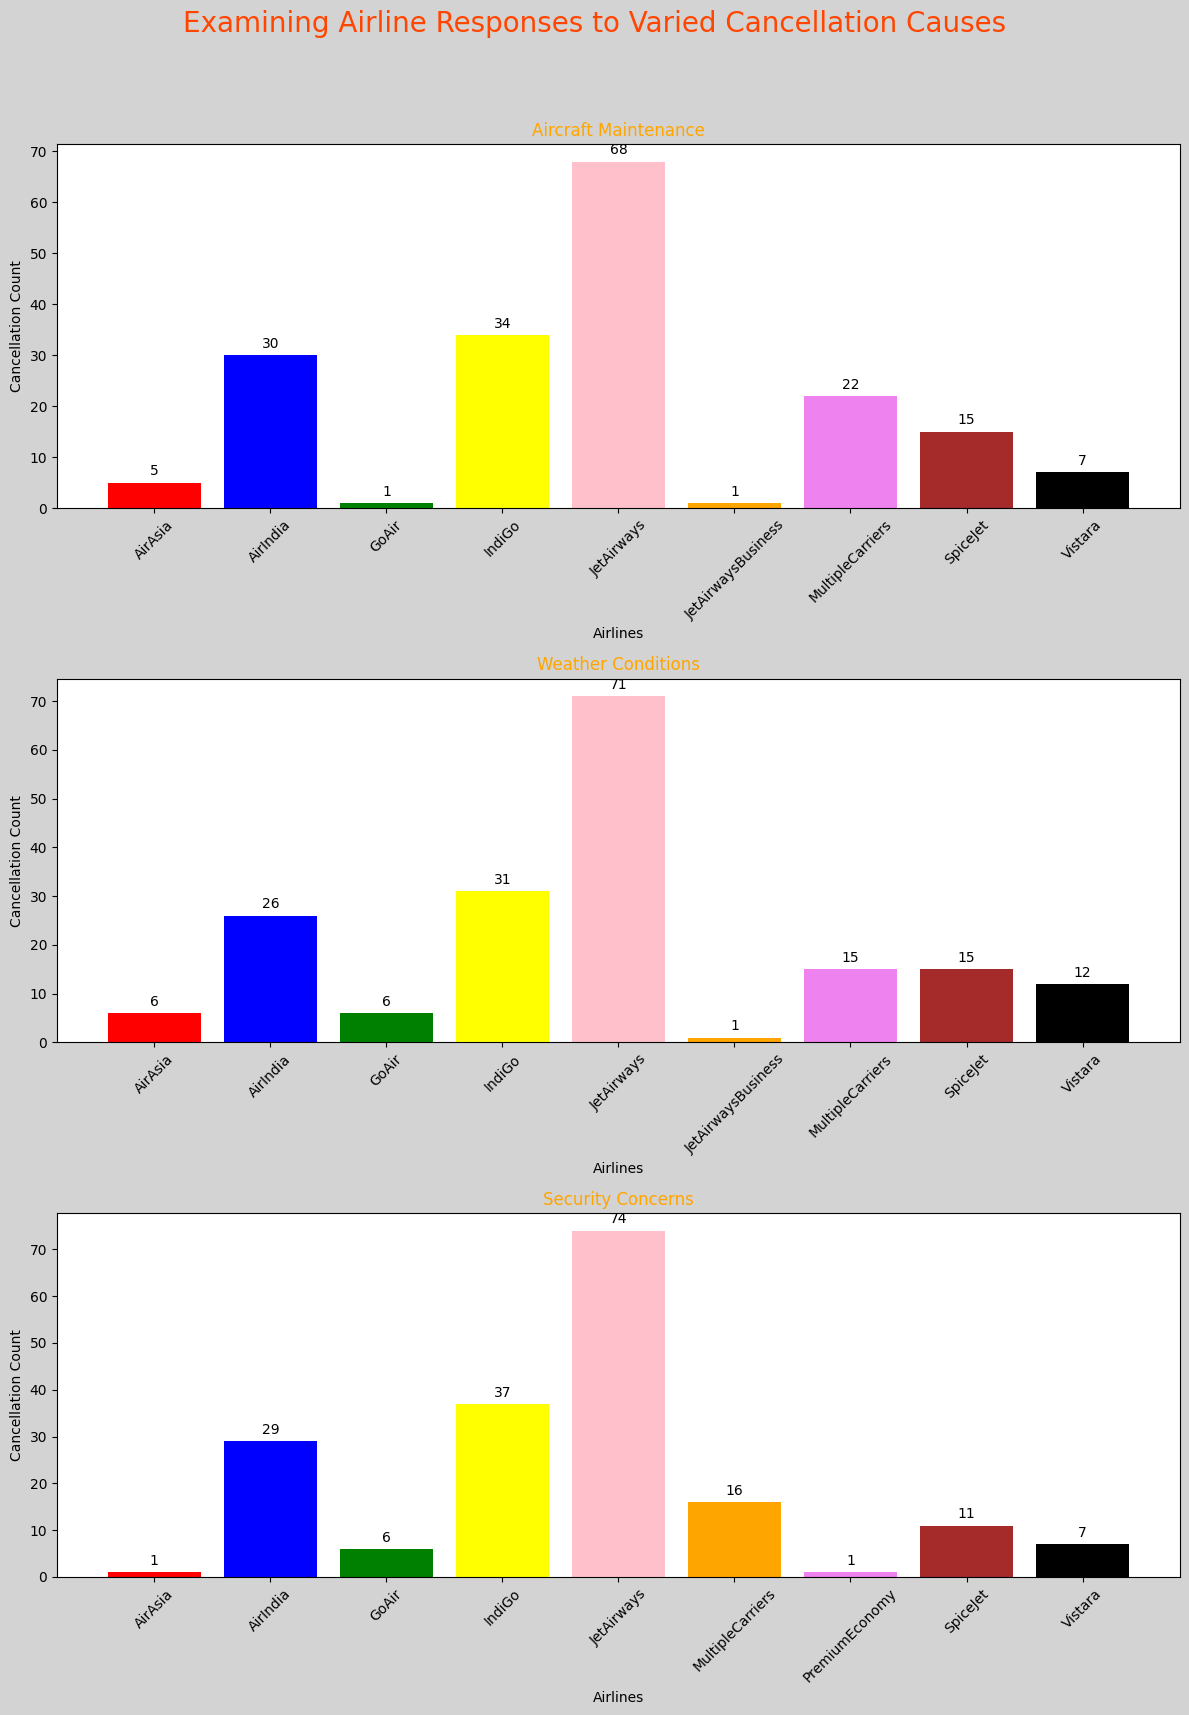

In [9]:
# Filter the DataFrame for each cancellation reason and count cancellations per airline
reasons = ['Aircraft Maintenance', 'Weather Conditions', 'Security Concerns']
result_dfs = {}

for reason in reasons:
    filter_condition = (df['Flight_Status'] == 'Cancelled') & (df['Status_Reason'] == reason)
    filtered_df = df[filter_condition]
    cancellation_counts = filtered_df.groupby('Airline').size()
    result_dfs[reason] = cancellation_counts.reset_index()
    result_dfs[reason].columns = ['Airline', 'Cancellation Count']

# Create subplots for each cancellation reason
fig, axs = plt.subplots(len(reasons), 1, figsize=(12, 18))

for i, reason in enumerate(reasons):
    bars = axs[i].bar(result_dfs[reason]["Airline"], result_dfs[reason]["Cancellation Count"], color=colors)
    axs[i].set_title(reason, color="orange")
    axs[i].set_xlabel("Airlines")
    axs[i].set_ylabel("Cancellation Count")
    axs[i].tick_params(axis='x', rotation=45)

    # Add annotations to each bar
    for bar, label in zip(bars, result_dfs[reason]["Cancellation Count"]):
        height = bar.get_height()
        axs[i].annotate(f'{label:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Set common title for the entire figure
fig.suptitle('Examining Airline Responses to Varied Cancellation Causes', fontsize=20, color="orangered")

# Adjust layout with a gap after the super title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin for the suptitle

# Set facecolor for the figure
fig.set_facecolor('lightgrey')

# Display the plots
plt.show()


# Airlines Maximum Duration with Total Stops Analysis

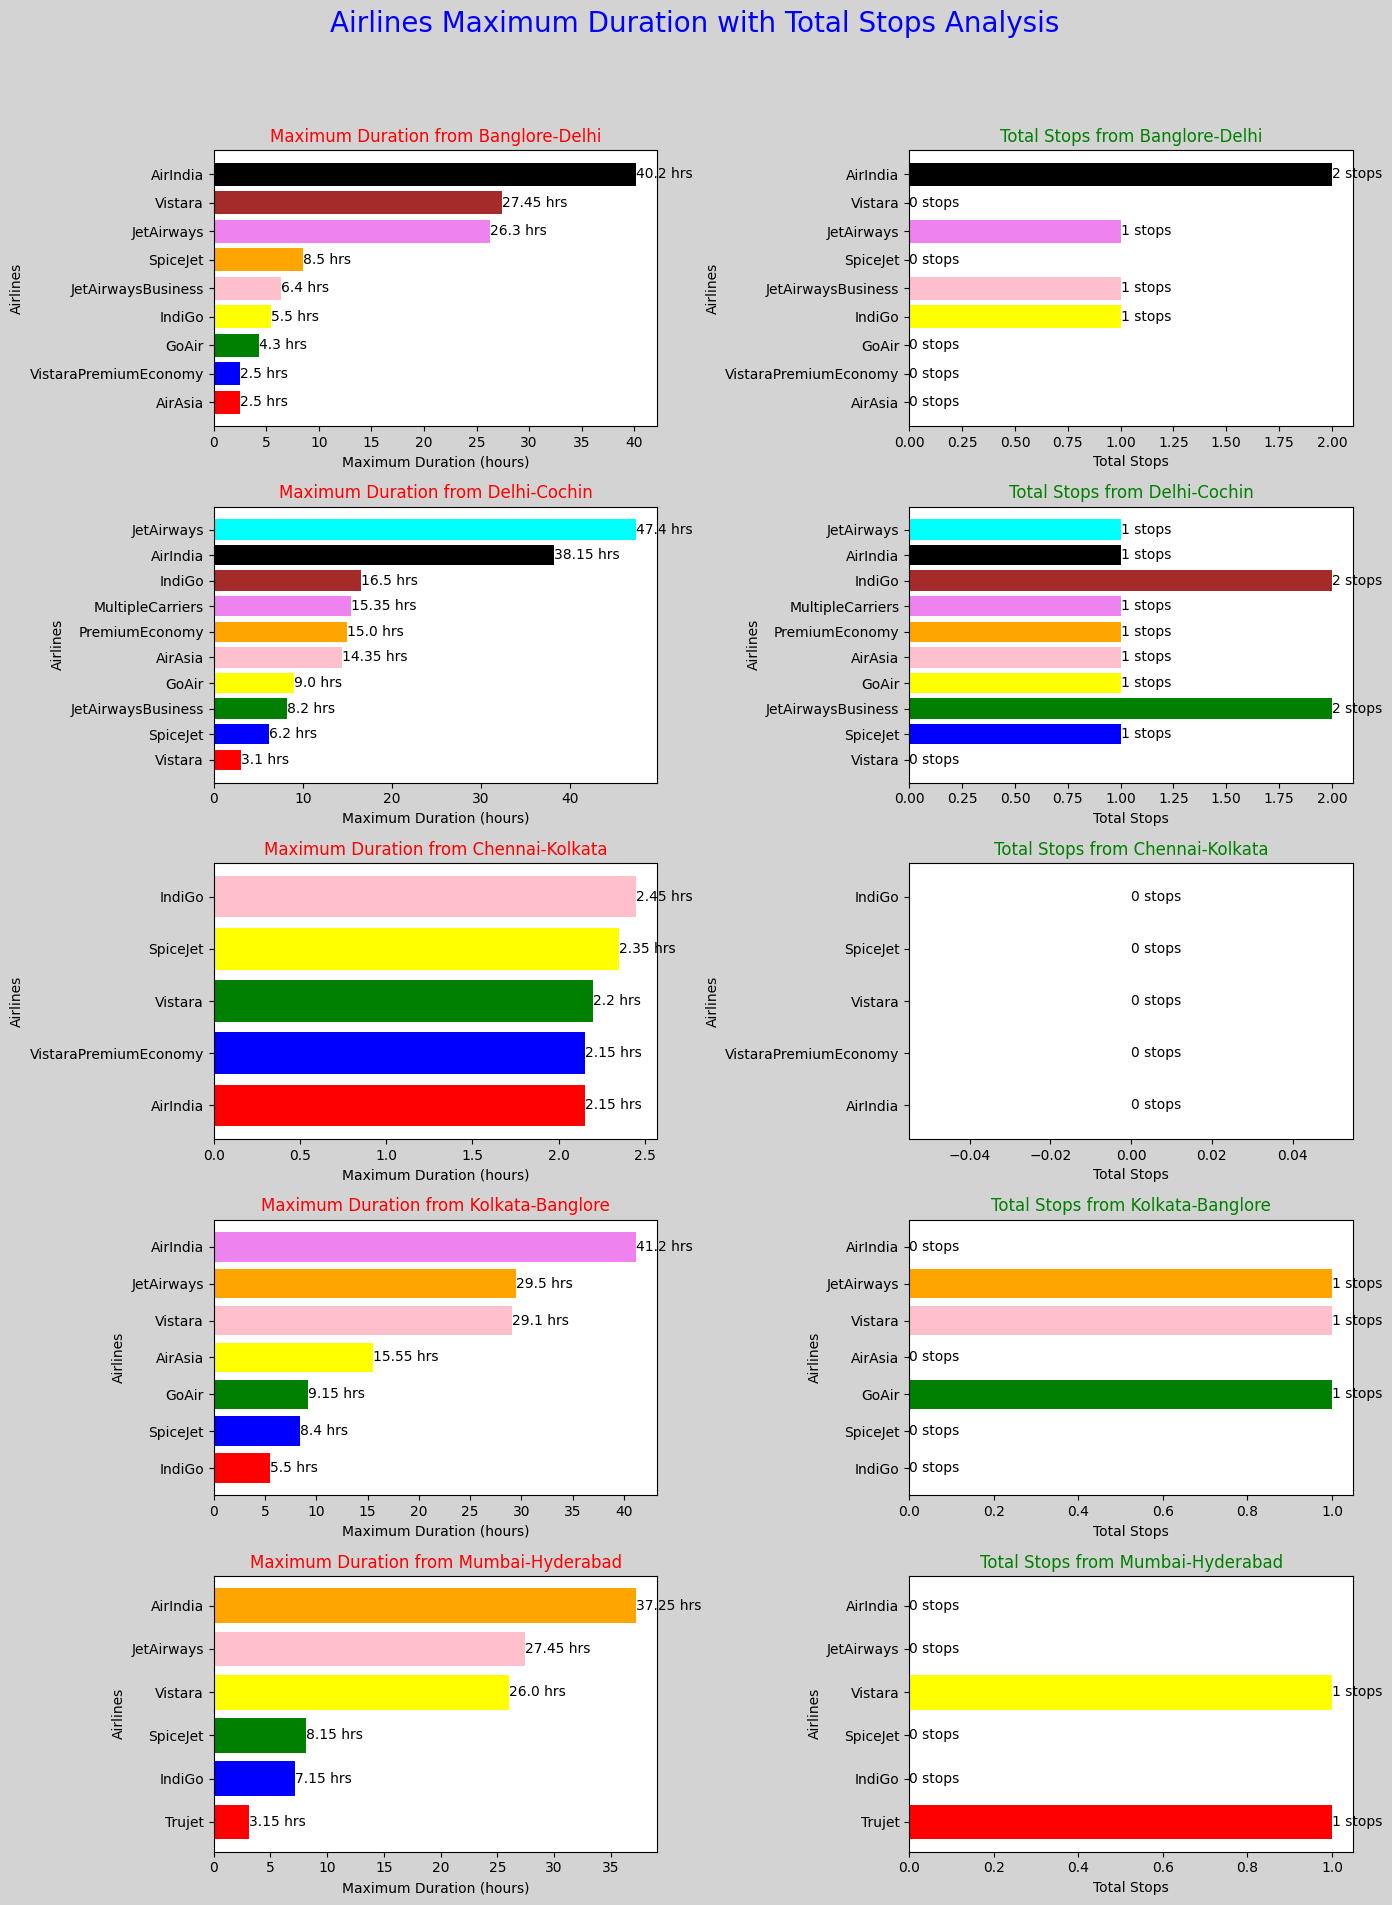

In [10]:
def chart_annotate_durations(ax, bars, numeric_values):
    # Add annotations to each bar using numeric values
    for bar, value in zip(bars, numeric_values):
        width = bar.get_width()
        if pd.notna(value):  # Check if value is not NaN
            ax.annotate(f'{value} hrs', xy=(width, bar.get_y() + bar.get_height() / 2),
                        va='center', fontsize=10)  # Annotate with formatted value
            
def chart_annotate_stops(ax, bars, numeric_values):
    # Add annotations to each bar using numeric values
    for bar, value in zip(bars, numeric_values):
        width = bar.get_width()

        ax.annotate(f'{int(value)} stops', xy=(width, bar.get_y() + bar.get_height() / 2),
                        va='center', fontsize=10)  # Annotate with formatted value

fig, axs = plt.subplots(5, 2, figsize=(14, 20))  # Create a grid of subplots
routes = {"Banglore": "Delhi", "Delhi": "Cochin", "Chennai": "Kolkata", "Kolkata": "Banglore", "Mumbai": "Hyderabad"}

index = 0  # Initialize index for subplot row

for source, destination in routes.items():
    max_duration_df = df[df['Flight_Status'] != 'Cancelled']
    flights_placements = max_duration_df[(max_duration_df['Source'] == source) & (max_duration_df['Destination'] == destination)]

    max_flights_info = flights_placements.groupby('Airline').agg({'Duration': 'max', 'Total_Stops': 'first'}).sort_values(by='Duration', ascending=True)
    result_df = max_flights_info.reset_index()

    # Plotting Max Duration and Total Stops on the current subplot
    bars_max = axs[index, 0].barh(result_df["Airline"], result_df["Duration"], color=colors)
    axs[index, 0].set_title(f"Maximum Duration from {source}-{destination}", color="red")
    axs[index, 0].set_xlabel("Maximum Duration (hours)")
    axs[index, 0].set_ylabel("Airlines")
    chart_annotate_durations(axs[index, 0], bars_max, result_df["Duration"])  # Annotate with Max Duration

    bars_stops = axs[index, 1].barh(result_df["Airline"], result_df["Total_Stops"], color=colors)
    axs[index, 1].set_title(f"Total Stops from {source}-{destination}", color="green")
    axs[index, 1].set_xlabel("Total Stops")
    axs[index, 1].set_ylabel("Airlines")
    chart_annotate_stops(axs[index, 1], bars_stops, result_df["Total_Stops"])  # Annotate with Total Stops

    index += 1  # Increment index for next subplot row

fig.suptitle('Airlines Maximum Duration with Total Stops Analysis', fontsize=20, color="blue")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin for the suptitle

fig.set_facecolor('lightgrey')

# Show the plot
plt.show()


# Airlines Minimum Duration with Total Stops Analysis

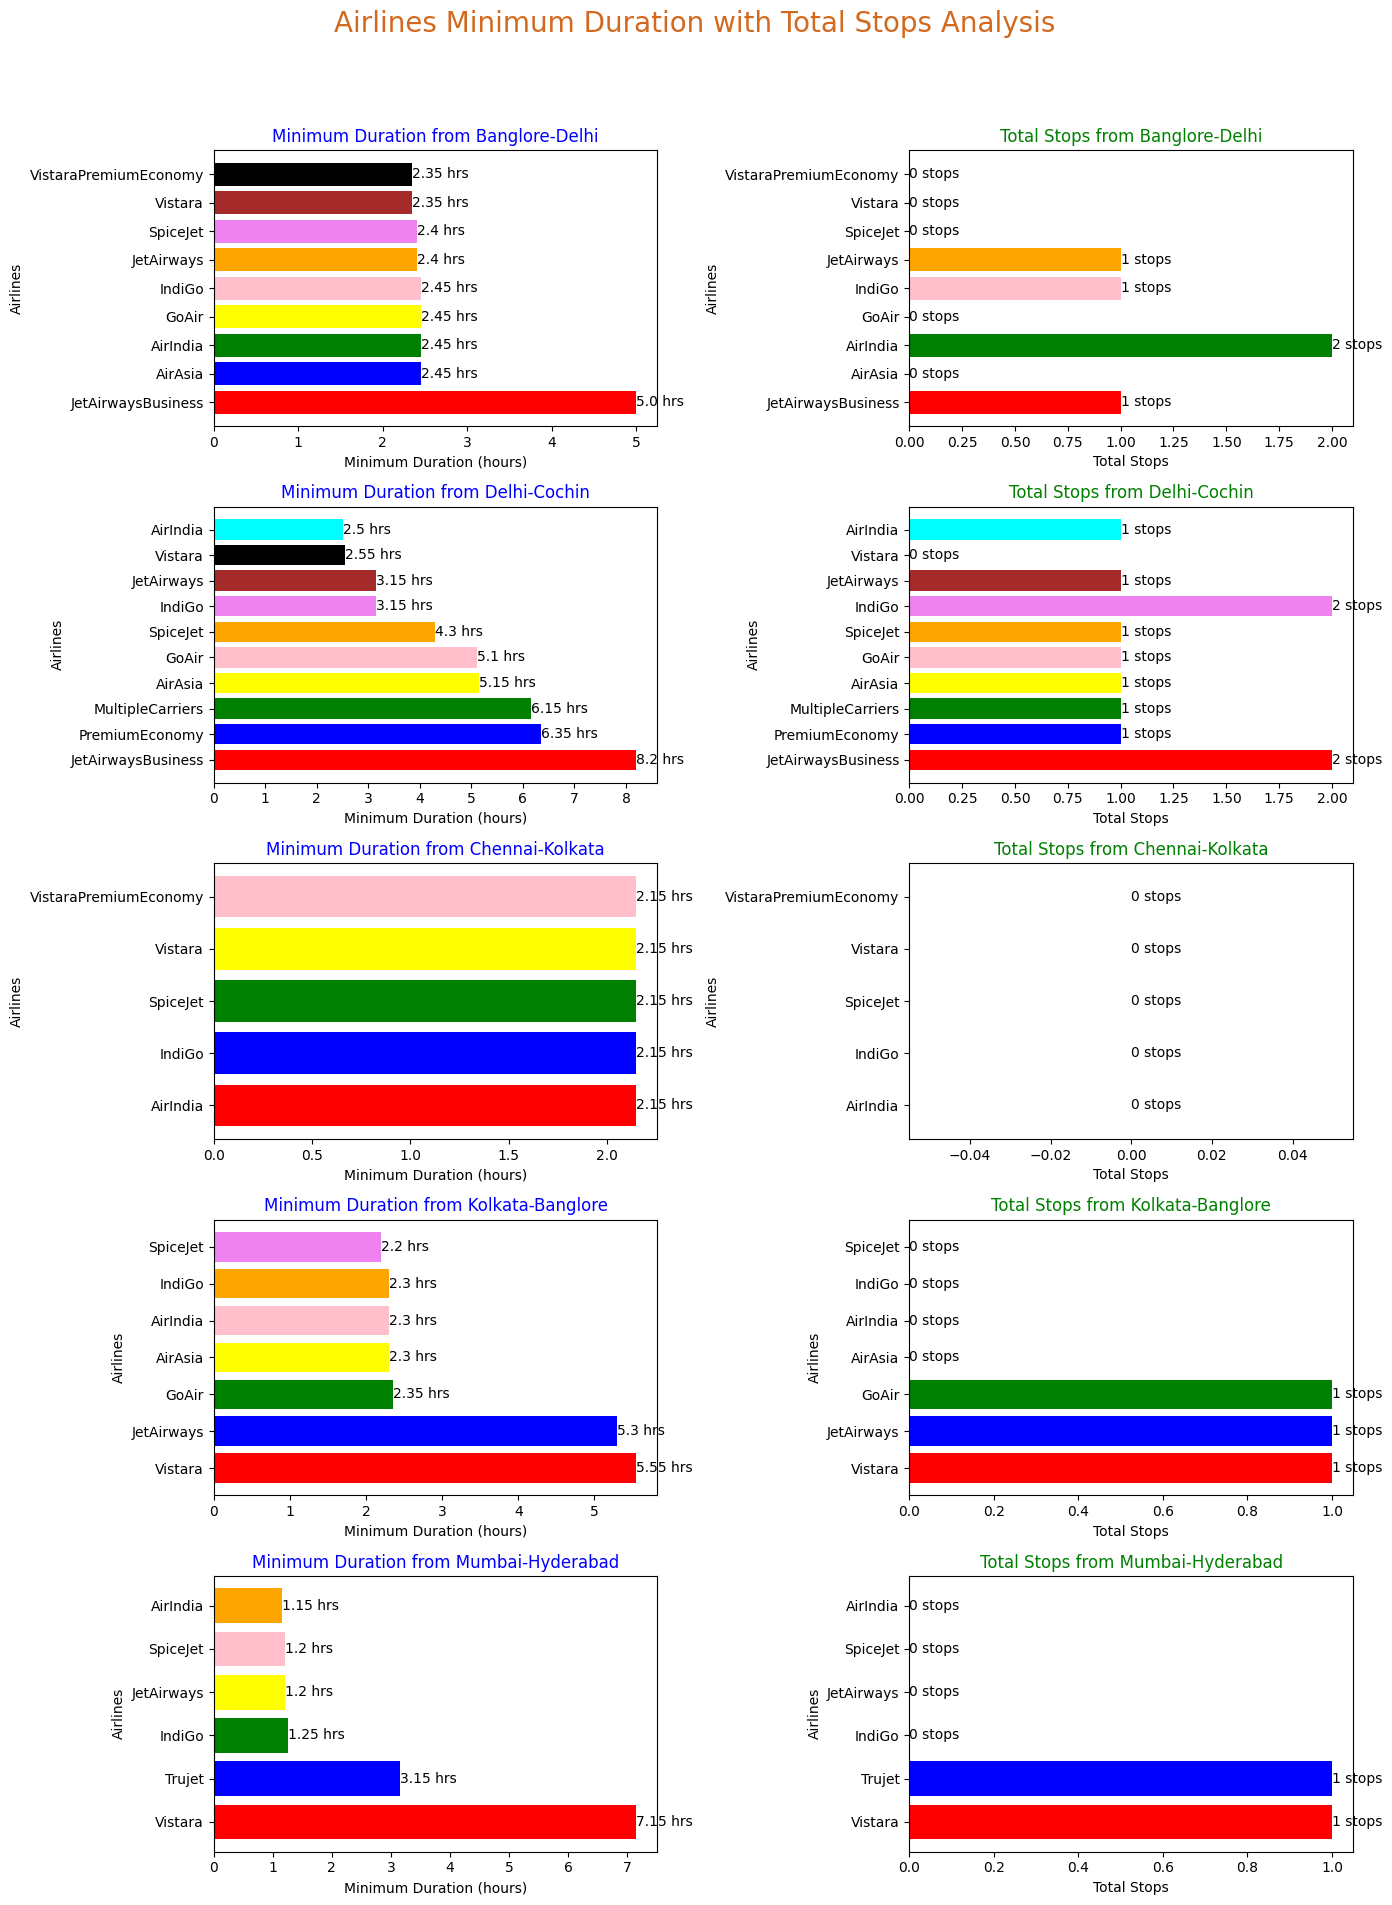

In [11]:
def chart_annotate_durations(ax, bars, numeric_values):
    # Add annotations to each bar using numeric values
    for bar, value in zip(bars, numeric_values):
        width = bar.get_width()
        if pd.notna(value):  # Check if value is not NaN
            ax.annotate(f'{value} hrs', xy=(width, bar.get_y() + bar.get_height() / 2),
                        va='center', fontsize=10)  # Annotate with formatted value
            
def chart_annotate_stops(ax, bars, numeric_values):
    # Add annotations to each bar using numeric values
    for bar, value in zip(bars, numeric_values):
        width = bar.get_width()

        ax.annotate(f'{int(value)} stops', xy=(width, bar.get_y() + bar.get_height() / 2),
                        va='center', fontsize=10)  # Annotate with formatted value

fig, axs = plt.subplots(5, 2, figsize=(14, 20))  # Create a grid of subplots
routes = {"Banglore": "Delhi", "Delhi": "Cochin", "Chennai": "Kolkata", "Kolkata": "Banglore", "Mumbai": "Hyderabad"}

index = 0  # Initialize index for subplot row

for source, destination in routes.items():
    min_duration_df = df[df['Flight_Status'] != 'Cancelled']
    flights_placements = min_duration_df[(min_duration_df['Source'] == source) & (min_duration_df['Destination'] == destination)]

    # #################### Maximum Duration and Total Stops ####################
    min_flights_info = flights_placements.groupby('Airline').agg({'Duration': 'min', 'Total_Stops': 'first'}).sort_values(by='Duration', ascending=False)
    result_df = min_flights_info.reset_index()

    # Plotting Max Duration and Total Stops on the current subplot
    bars_min = axs[index, 0].barh(result_df["Airline"], result_df["Duration"], color=colors)
    axs[index, 0].set_title(f"Minimum Duration from {source}-{destination}", color="blue")
    axs[index, 0].set_xlabel("Minimum Duration (hours)")
    axs[index, 0].set_ylabel("Airlines")
    chart_annotate_durations(axs[index, 0], bars_min, result_df["Duration"])  # Annotate with Min Duration

    bars_stops = axs[index, 1].barh(result_df["Airline"], result_df["Total_Stops"], color=colors)
    axs[index, 1].set_title(f"Total Stops from {source}-{destination}", color="green")
    axs[index, 1].set_xlabel("Total Stops")
    axs[index, 1].set_ylabel("Airlines")
    chart_annotate_stops(axs[index, 1], bars_stops, result_df["Total_Stops"])  # Annotate with Total Stops

    index += 1  # Increment index for next subplot row

# Adjust layout
fig.suptitle('Airlines Minimum Duration with Total Stops Analysis', fontsize=20, color="chocolate")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin for the suptitle

# Show the plot
plt.show()


# Exploring Top 10 Most Common Departure Times Across Different Locations

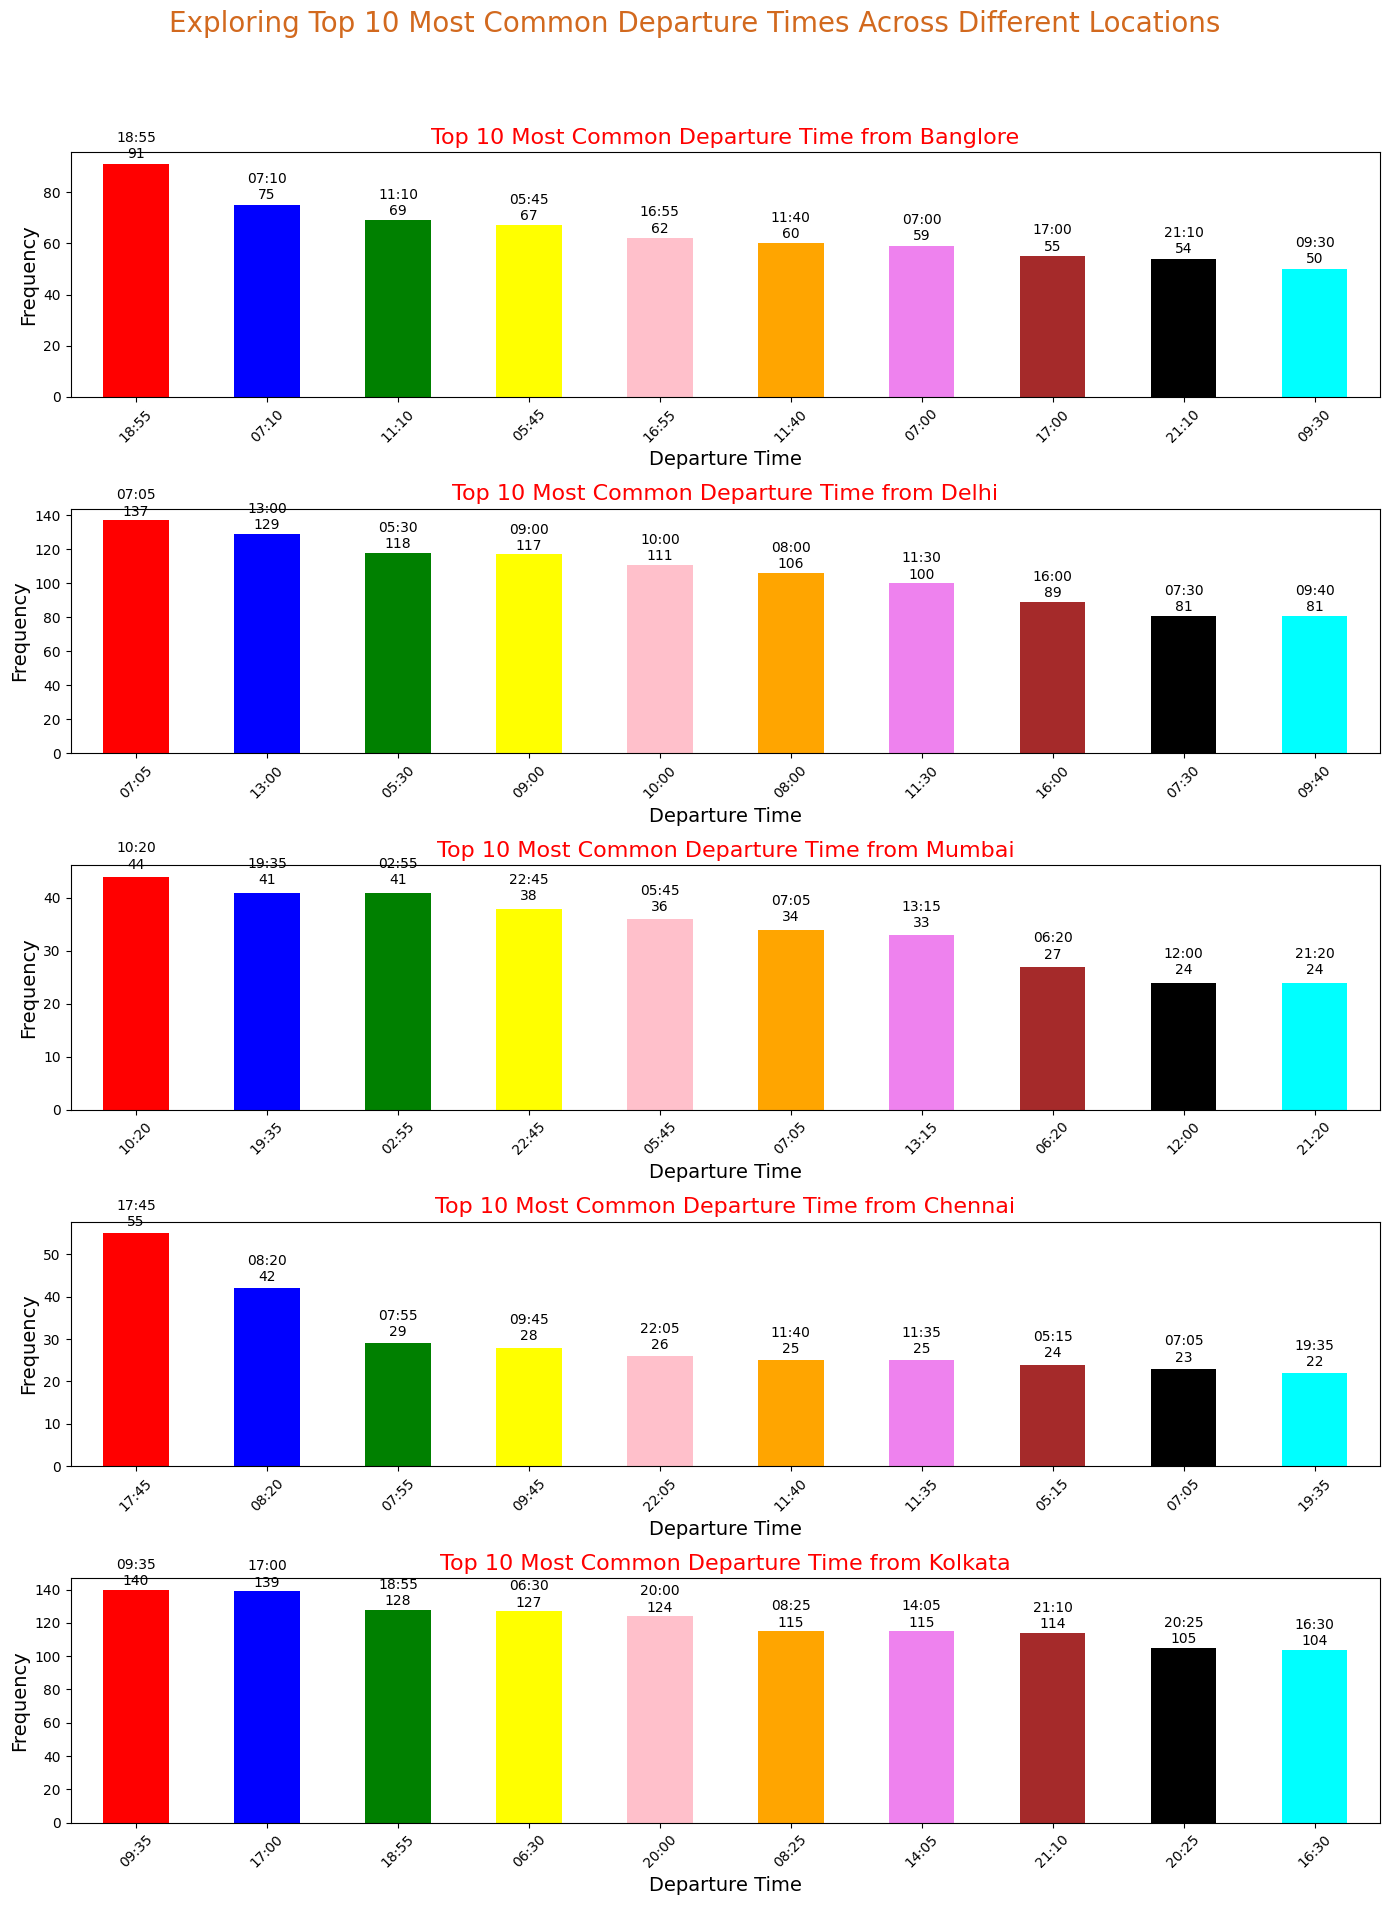

In [12]:
index = 0
Dept_locs = ["Banglore", "Delhi", "Mumbai", "Chennai", "Kolkata"]
fig, axs = plt.subplots(len(Dept_locs), 1, figsize=(14, 20))  # Create a grid of subplots

for i, loc in enumerate(Dept_locs):
    df = df[df['Flight_Status'] != 'Cancelled']
    dept_flights = df[df['Source'] == loc]
    # Get the top 10 most common departure times and their counts
    top_10_dep_times = dept_flights['Dep_Time'].value_counts().nlargest(10)
    
    # Create a bar plot for visualization on the corresponding subplot
    top_10_dep_times.plot(kind='bar', ax=axs[i], color=colors)
    
    # Set plot title and labels for each subplot
    axs[i].set_title(f'Top 10 Most Common Departure Time from {loc}', fontsize=16, color="red")
    axs[i].set_xlabel('Departure Time', fontsize=14)
    axs[i].set_ylabel('Frequency', fontsize=14)
    
    # Annotate each bar with the departure time and count
    for j, count in enumerate(top_10_dep_times):
        dep_time = top_10_dep_times.index[j]
        axs[i].text(j, count + 1, f'{dep_time}\n{count}', ha='center', va='bottom', fontsize=10)
    
    # Rotate x-axis labels for better readability
    axs[i].tick_params(axis='x', rotation=45)

# Adjust layout
fig.suptitle('Exploring Top 10 Most Common Departure Times Across Different Locations', fontsize=20, color="chocolate")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin for the suptitle

# Show plot
plt.show()


# Exploring Top 10 Most Common Arrival Times Across Different Locations

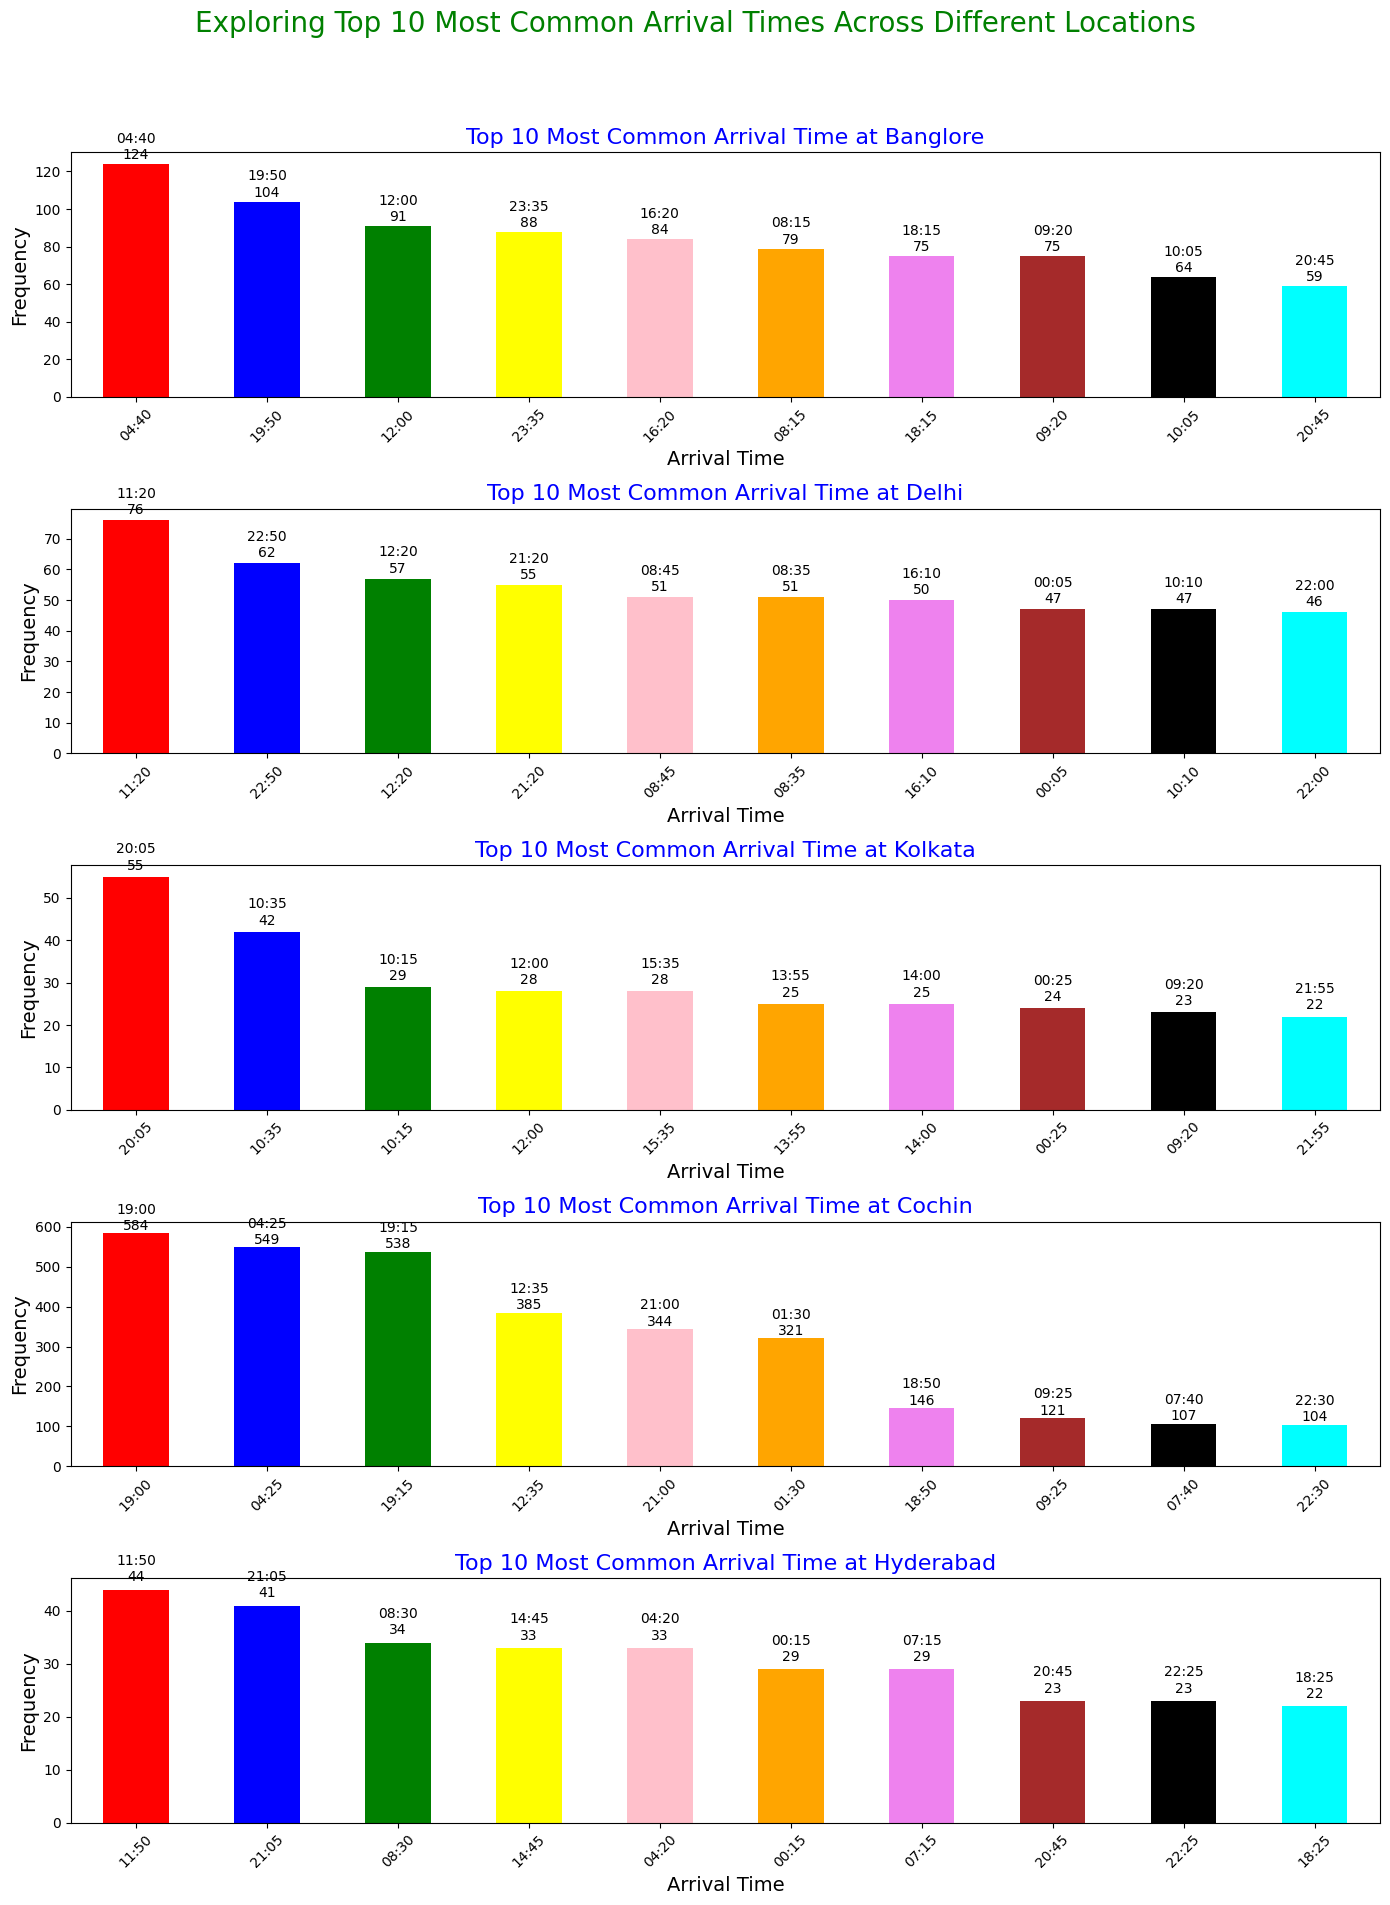

In [13]:
Arr_locs = ["Banglore", "Delhi", "Kolkata", "Cochin", "Hyderabad"]
fig, axs = plt.subplots(len(Arr_locs), 1, figsize=(14, 20))  # Create a grid of subplots

for i, loc in enumerate(Arr_locs):
    df = df[df['Flight_Status'] != 'Cancelled']
    arr_flights = df[df['Destination'] == loc]  # Assuming 'Destination' is the column name for arrival location
    top_10_arr_times = arr_flights['Arrival_Time'].value_counts().nlargest(10)
    
    if not top_10_arr_times.empty:
        # Create a bar plot for visualization on the corresponding subplot
        top_10_arr_times.plot(kind='bar', ax=axs[i], color=colors)
        
        # Set plot title and labels for each subplot
        axs[i].set_title(f'Top 10 Most Common Arrival Time at {loc}', fontsize=16, color="blue")
        axs[i].set_xlabel('Arrival Time', fontsize=14)
        axs[i].set_ylabel('Frequency', fontsize=14)
        
        # Annotate each bar with the arrival time and count
        for j, count in enumerate(top_10_arr_times):
            arr_time = top_10_arr_times.index[j]
            axs[i].text(j, count + 1, f'{arr_time}\n{count}', ha='center', va='bottom', fontsize=10)
        
        # Rotate x-axis labels for better readability
        axs[i].tick_params(axis='x', rotation=45)
    else:
        # If no data is available for this location, set a message or handle accordingly
        axs[i].set_title(f'No Data Available for {loc}', fontsize=16)
        axs[i].axis('off')  # Turn off the axis for empty plots

# Adjust layout
fig.suptitle('Exploring Top 10 Most Common Arrival Times Across Different Locations', fontsize=20, color="green")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin for the suptitle

# Show plot
plt.show()


# Comparing Airlines by Maximum Total Seats

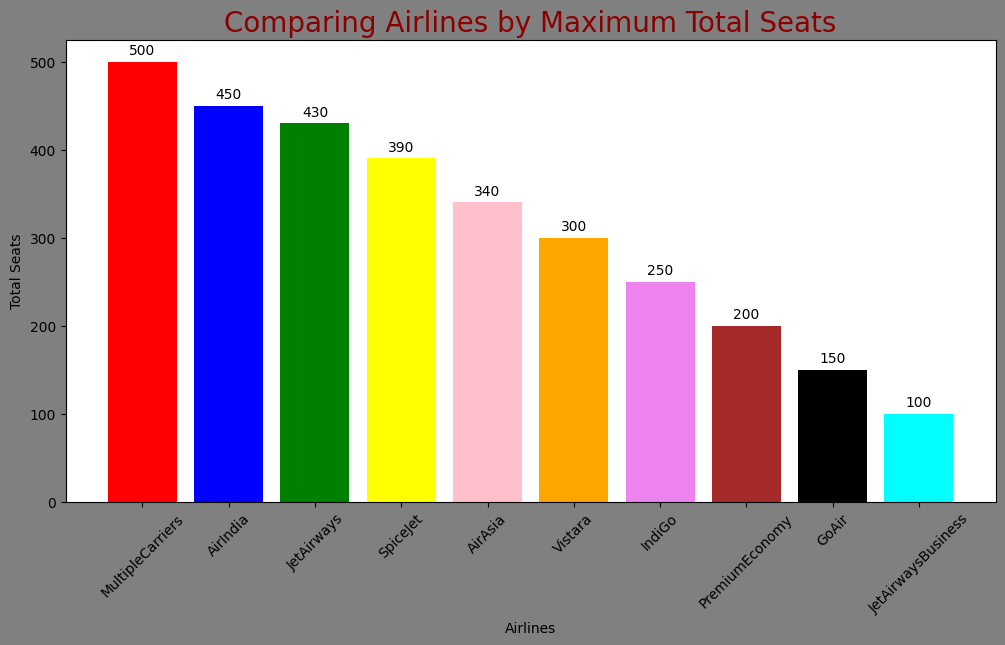

In [14]:
# Group by Airline and count the number of cancellations per airline
flight_completed_by_airline = df.groupby('Airline')['Total_Seats_Present'].max().sort_values(ascending=False)

# Convert the result to a DataFrame for easier viewing
result_df = flight_completed_by_airline.reset_index()
result_df.columns = ['Airline', 'Total Seats']

fig, ax = plt.subplots(figsize=(12,6))

bars = ax.bar(result_df["Airline"], result_df["Total Seats"], color = colors)
ax.set_xlabel("Airlines")
ax.set_ylabel("Total Seats")

plt.title('Comparing Airlines by Maximum Total Seats', fontsize=20, color="darkred")

for bar, label in zip(bars, result_df["Total Seats"]):
    height = bar.get_height()
    ax.annotate(f'{label:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

fig.set_facecolor('grey')
ax.tick_params(axis='x', rotation=45)

plt.show()

# Average Vacant Seats per Airlines

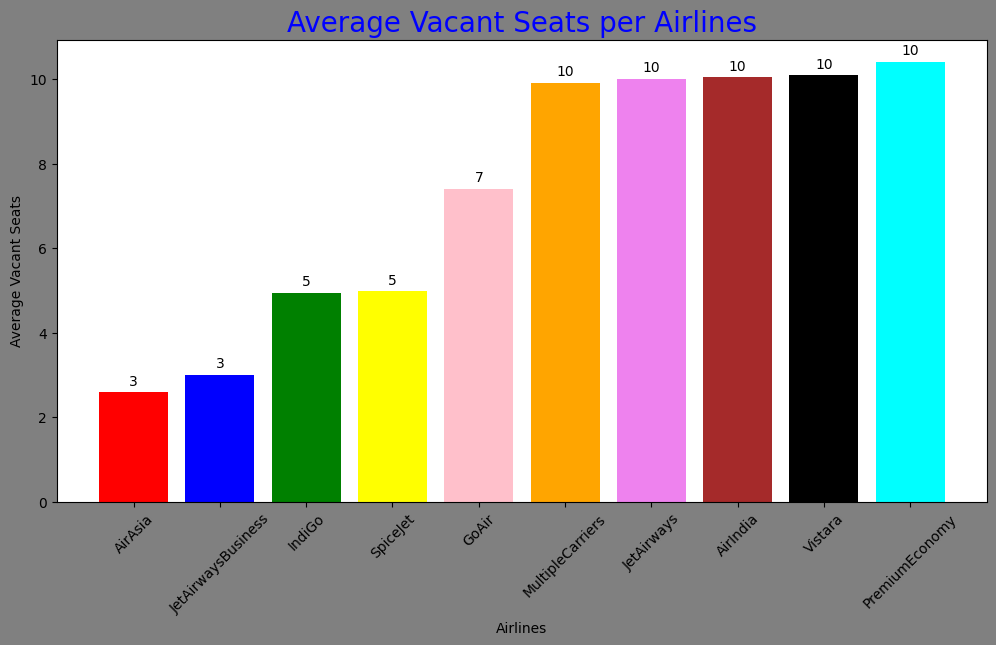

In [15]:
completed_flights = df[df['Flight_Status'] != 'Cancelled']

# Group by Airline and calculate the average number of vacant seats per airline
average_vacant_seats_by_airline = completed_flights.groupby('Airline')['Total_Seats_Vacant'].mean().sort_values(ascending=True)

# Convert the result to a DataFrame for easier viewing
result_df = average_vacant_seats_by_airline.reset_index()
result_df.columns = ['Airline', 'Average Vacant Seats']

# Plotting the average number of vacant seats per airline
fig, ax = plt.subplots(figsize=(12,6))

bars = ax.bar(result_df["Airline"], result_df["Average Vacant Seats"], color=colors)
ax.set_xlabel("Airlines")
ax.set_ylabel("Average Vacant Seats")

plt.title('Average Vacant Seats per Airlines', fontsize=20, color="blue")

for bar, label in zip(bars, result_df["Average Vacant Seats"]):
    height = bar.get_height()
    ax.annotate(f'{label:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Set background color for the plot
fig.set_facecolor('grey')
ax.tick_params(axis='x', rotation=45)

plt.show()


# Exploring Airlines with Maximum Ratings

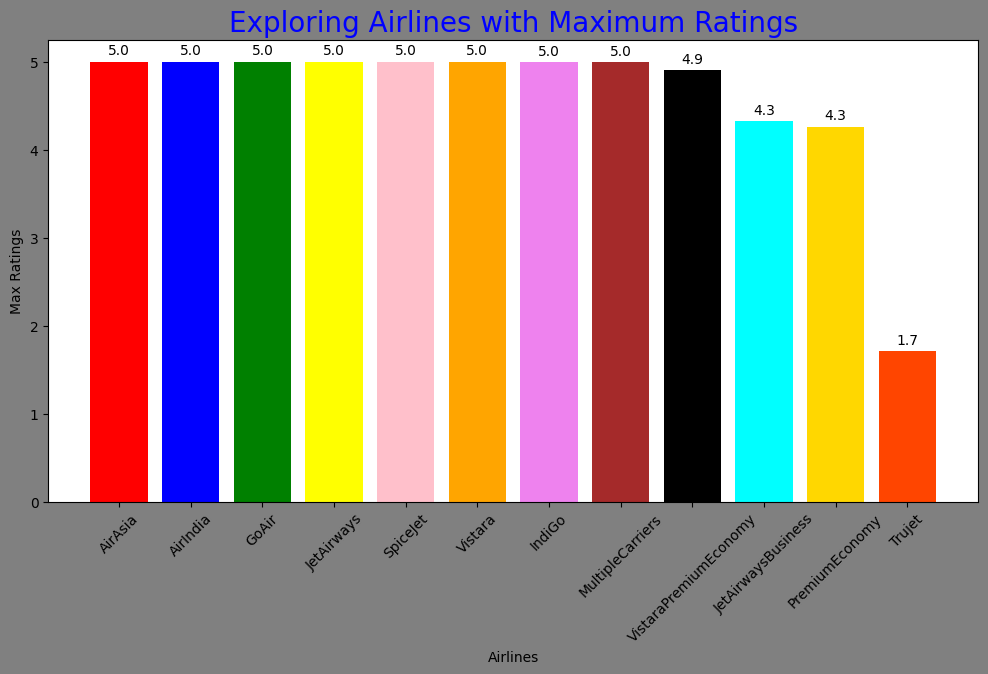

In [16]:
# Group by Airline and calculate the average number of vacant seats per airline
max_rating_airline = df.groupby('Airline')['Ratings'].max().sort_values(ascending=False)

# Convert the result to a DataFrame for easier viewing
result_df = max_rating_airline.reset_index()
result_df.columns = ['Airline', 'Max Ratings']

# Plotting the average number of vacant seats per airline
fig, ax = plt.subplots(figsize=(12,6))

bars = ax.bar(result_df["Airline"], result_df["Max Ratings"], color=colors)
ax.set_xlabel("Airlines")
ax.set_ylabel("Max Ratings")

plt.title('Exploring Airlines with Maximum Ratings', fontsize=20, color="blue")

for bar, label in zip(bars, result_df["Max Ratings"]):
    height = bar.get_height()
    ax.annotate(f'{label:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Set background color for the plot
fig.set_facecolor('grey')
ax.tick_params(axis='x', rotation=45)

plt.show()


# Exploring Airlines with Minimum Ratings for Completed Flights

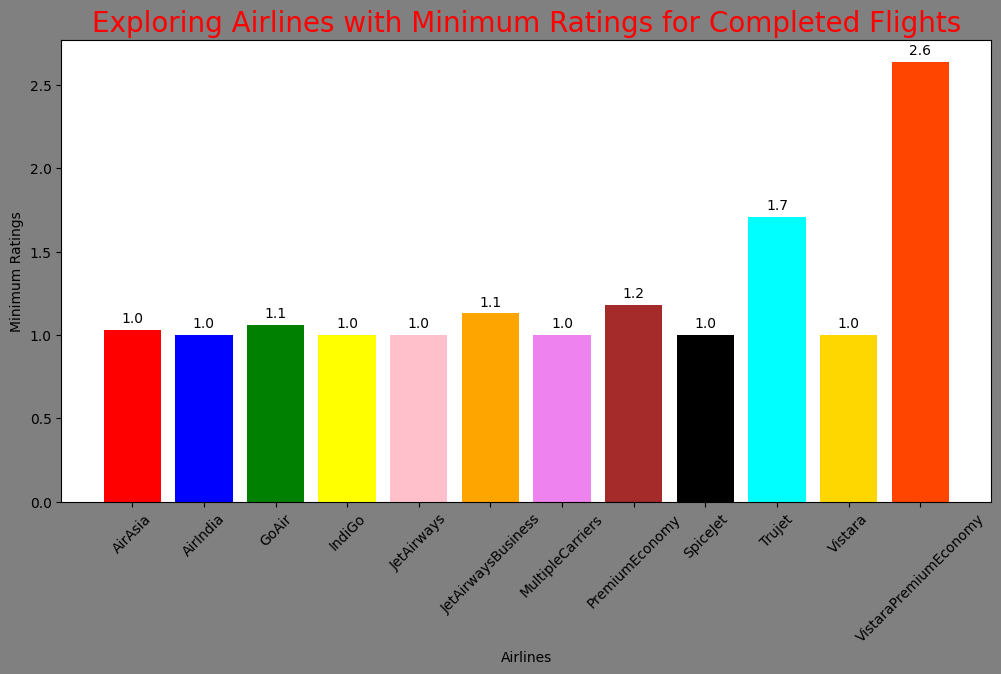

In [17]:
completed_flights = df[df['Flight_Status'] != 'Cancelled']

# Group by Airline and calculate the average number of vacant seats per airline
min_rating_airline = completed_flights.groupby('Airline')['Ratings'].min()


# Convert the result to a DataFrame for easier viewing
result_df = min_rating_airline.reset_index()
result_df.columns = ['Airline', 'Min Ratings']

# Plotting the average number of vacant seats per airline
fig, ax = plt.subplots(figsize=(12,6))

bars = ax.bar(result_df["Airline"], result_df["Min Ratings"], color=colors)
ax.set_xlabel("Airlines")
ax.set_ylabel("Minimum Ratings")

plt.title('Exploring Airlines with Minimum Ratings for Completed Flights', fontsize=20, color="red")

for bar, label in zip(bars, result_df["Min Ratings"]):
    height = bar.get_height()
    ax.annotate(f'{label:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Set background color for the plot
fig.set_facecolor('grey')
ax.tick_params(axis='x', rotation=45)

plt.show()


# Analyzing Airlines by Average Ratings

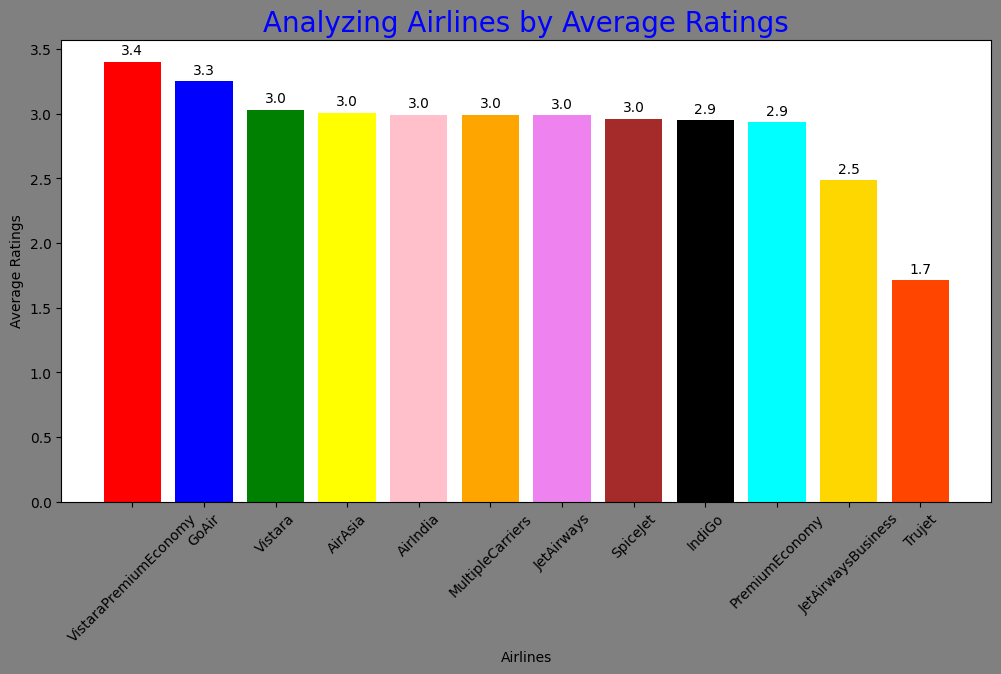

In [18]:
# Group by Airline and calculate the average number of vacant seats per airline
min_rating_airline = df.groupby('Airline')['Ratings'].mean().sort_values(ascending=False)


# Convert the result to a DataFrame for easier viewing
result_df = min_rating_airline.reset_index()
result_df.columns = ['Airline', 'Average Ratings']

# Plotting the average number of vacant seats per airline
fig, ax = plt.subplots(figsize=(12,6))

bars = ax.bar(result_df["Airline"], result_df["Average Ratings"], color=colors)
ax.set_xlabel("Airlines")
ax.set_ylabel("Average Ratings")

plt.title('Analyzing Airlines by Average Ratings', fontsize=20, color="blue")

for bar, label in zip(bars, result_df["Average Ratings"]):
    height = bar.get_height()
    ax.annotate(f'{label:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Set background color for the plot
fig.set_facecolor('grey')
ax.tick_params(axis='x', rotation=45)

plt.show()
